## Name: Faith Jeptoo
### CyberShujaa ID: CS_DA02_25005
## Title: Classification Models Project - (Wine Classification — Supervised Learning)
## Date: 6 November 2025

This notebook trains and compares six classification models on scikit-learn's Wine dataset:
Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, Gaussian Naive Bayes, SVM
It includes EDA, preprocessing, model training, evaluation metrics, confusion matrices, and comparison.

## 1. Imports

In [ ]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Settings for plots
%matplotlib inline
sns.set(style="whitegrid")
RANDOM_STATE = 42

## 2. Load dataset and create DataFrame

In [ ]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nTarget names:", wine.target_names)

Features shape: (178, 13)
Target shape: (178,)

Target names: ['class_0' 'class_1' 'class_2']


## 3. Exploratory Data Analysis (EDA)
- Quick look at features, missing values
- Class distribution
- Correlation heatmap and pairwise relationships for selected features

In [ ]:
# Head and summary
display(X.head())
display(X.describe().T)
# Missing values check
print("\nMissing values per column:\n", X.isna().sum())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00



Missing values per column:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


Class counts:
 target
0    59
1    71
2    48
Name: count, dtype: int64


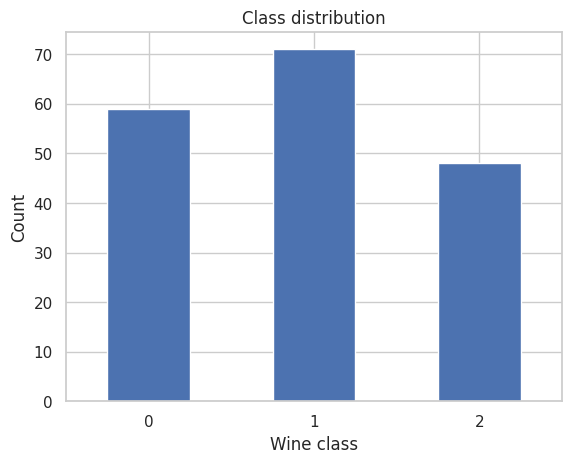

In [ ]:
# Class distribution
class_counts = y.value_counts().sort_index()
print("Class counts:\n", class_counts)
ax = class_counts.plot(kind='bar', rot=0)
ax.set_xlabel('Wine class')
ax.set_ylabel('Count')
ax.set_title('Class distribution')
plt.show()

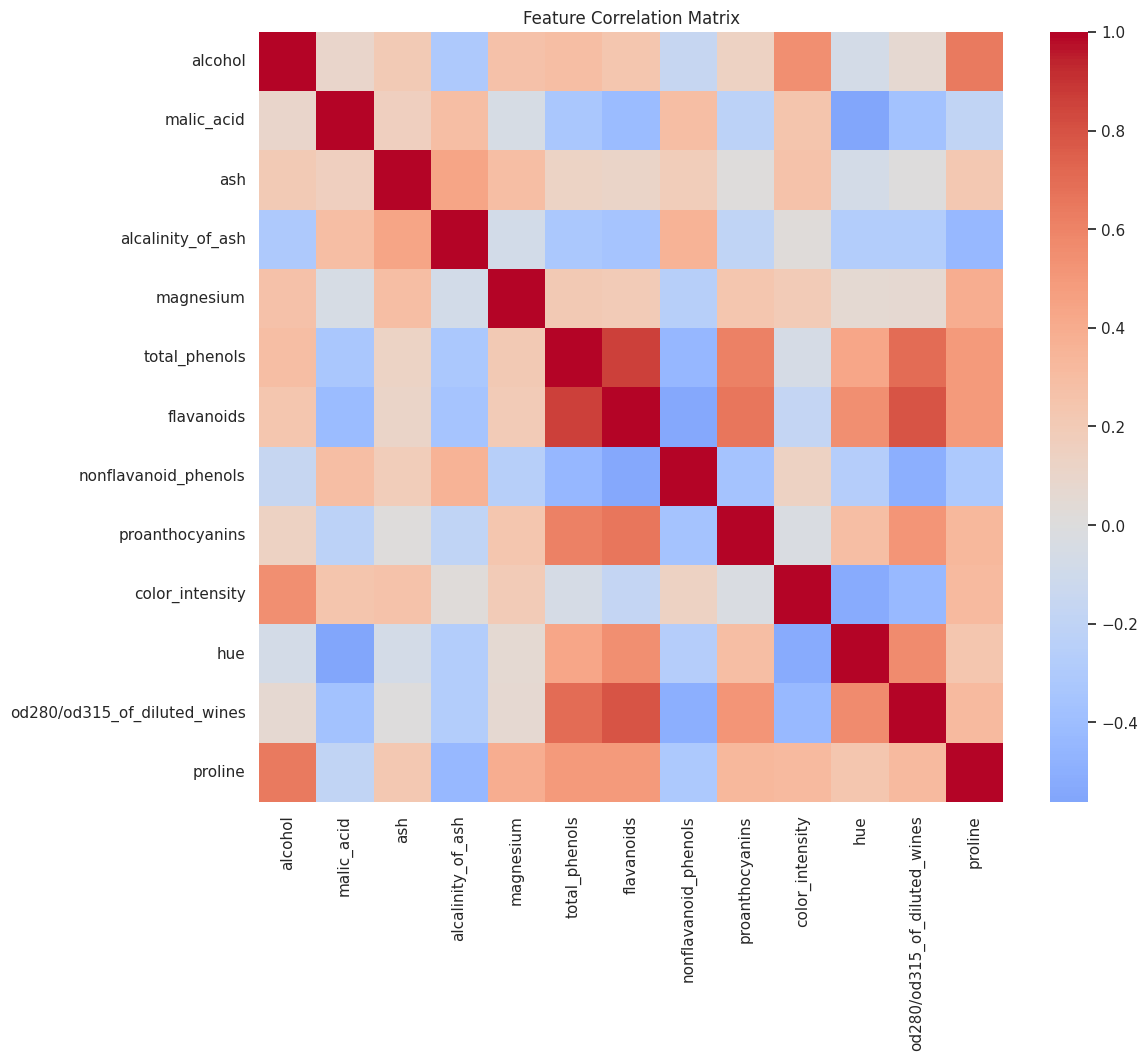

In [ ]:
# Correlation matrix (visual)
plt.figure(figsize=(12,10))
corr = X.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.show()

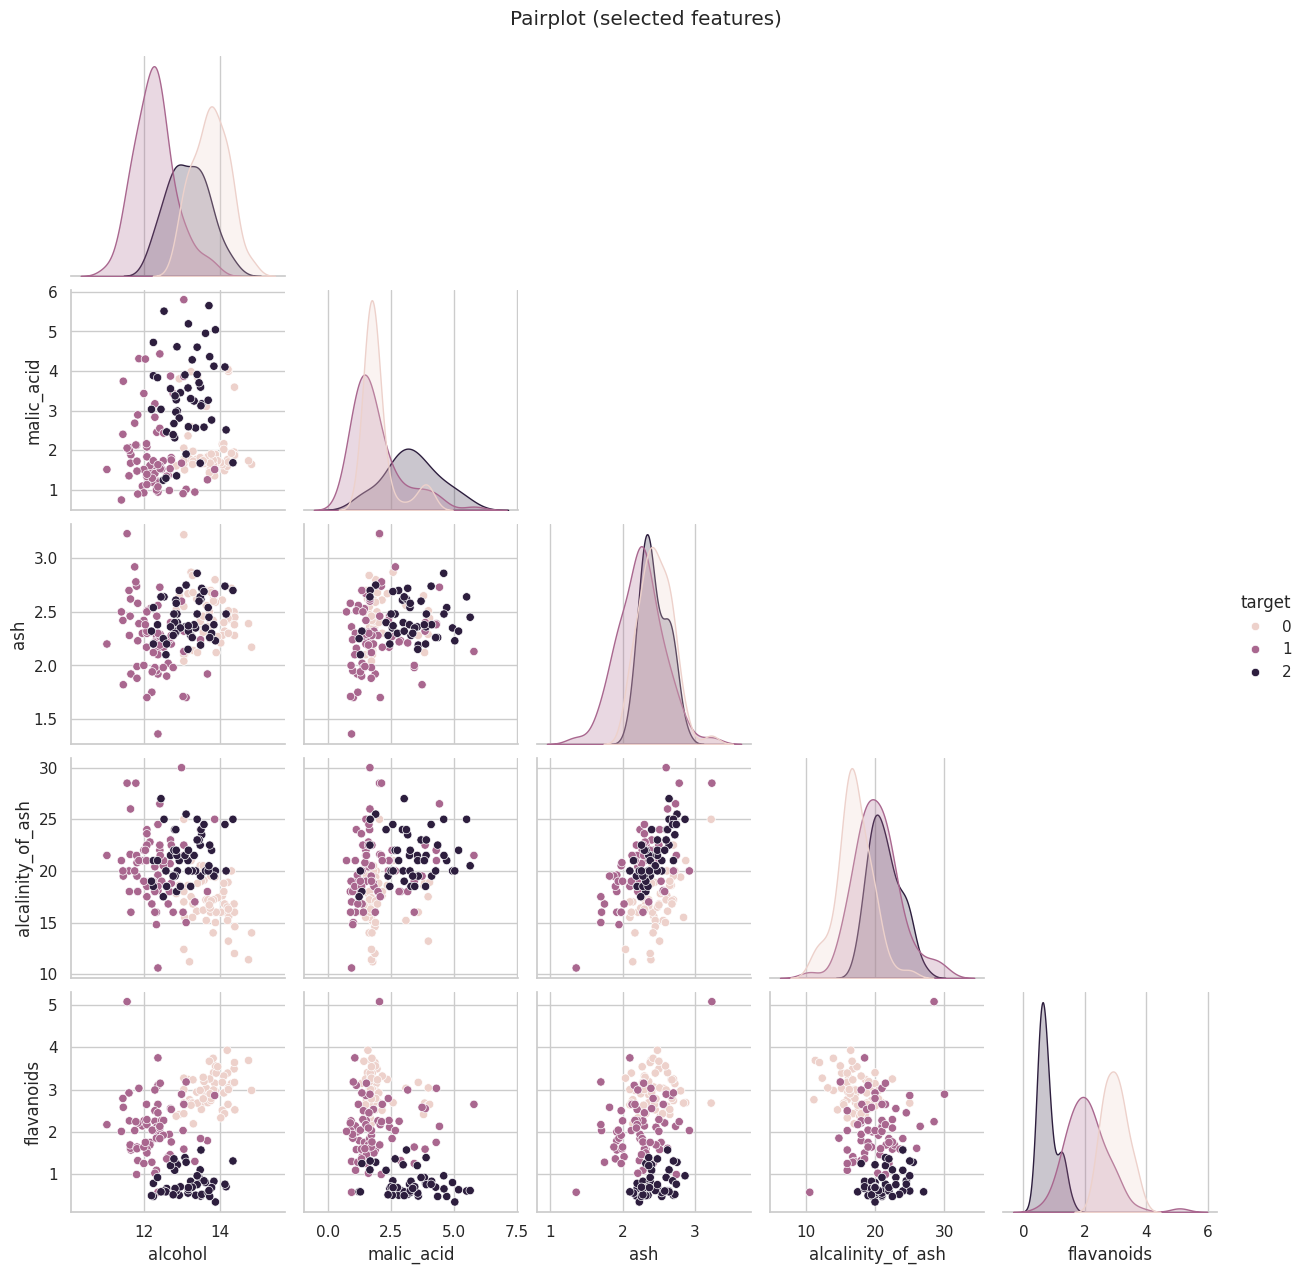

In [ ]:
# Optional: Pairplot for a subset of features to keep it readable
subset = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'flavanoids']
sns.pairplot(pd.concat([X[subset], y], axis=1), hue='target', diag_kind='kde', corner=True)
plt.suptitle("Pairplot (selected features)", y=1.02)
plt.show()

## 4. Prepare data: scaling and train/test split
- We'll scale features with StandardScaler (important for distance-based and SVM models)
- Use stratified split to keep class proportions

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE, stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

# Scale features (fit scaler on training set only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train size: (124, 13) Test size: (54, 13)


## 5. Helper function: fit, predict, evaluate and plot confusion matrix

In [ ]:
def evaluate_model(name, model, X_tr, X_te, y_tr, y_te, plot_cm=True):
    """Fits model, predicts, prints classification report and returns accuracy & report dict"""
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    report = classification_report(y_te, y_pred, target_names=wine.target_names, digits=4)
    print(f"===== {name} =====")
    print(f"Accuracy: {acc:.4f}\n")
    print(report)
    if plot_cm:
        cm = confusion_matrix(y_te, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
        fig, ax = plt.subplots(figsize=(5,4))
        disp.plot(ax=ax, cmap='Blues', values_format='d')
        ax.set_title(f'Confusion Matrix — {name}')
        plt.show()
    return acc

## 6. Train and evaluate models
We'll use pipelines (where helpful) and consistent random_state for reproducibility.

===== Logistic Regression =====
Accuracy: 0.9815

              precision    recall  f1-score   support

     class_0     0.9474    1.0000    0.9730        18
     class_1     1.0000    0.9524    0.9756        21
     class_2     1.0000    1.0000    1.0000        15

    accuracy                         0.9815        54
   macro avg     0.9825    0.9841    0.9829        54
weighted avg     0.9825    0.9815    0.9815        54



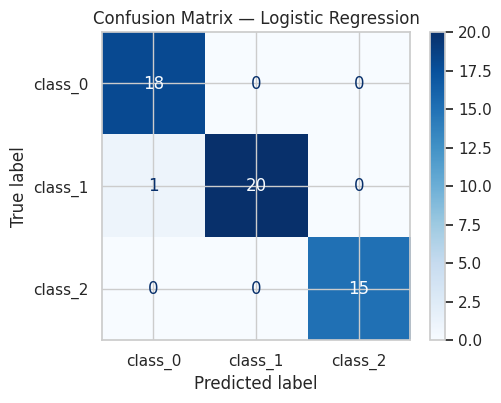

In [ ]:
results = []

# 1) Logistic Regression (scale required)
lr = LogisticRegression(max_iter=2000, random_state=RANDOM_STATE)
lr_pipeline = make_pipeline(StandardScaler(), lr)  # ensures scaling
acc_lr = evaluate_model("Logistic Regression", lr_pipeline, X_train, X_test, y_train, y_test)
results.append(("Logistic Regression", acc_lr))



===== Decision Tree =====
Accuracy: 0.9630

              precision    recall  f1-score   support

     class_0     1.0000    0.9444    0.9714        18
     class_1     0.9130    1.0000    0.9545        21
     class_2     1.0000    0.9333    0.9655        15

    accuracy                         0.9630        54
   macro avg     0.9710    0.9593    0.9638        54
weighted avg     0.9662    0.9630    0.9632        54



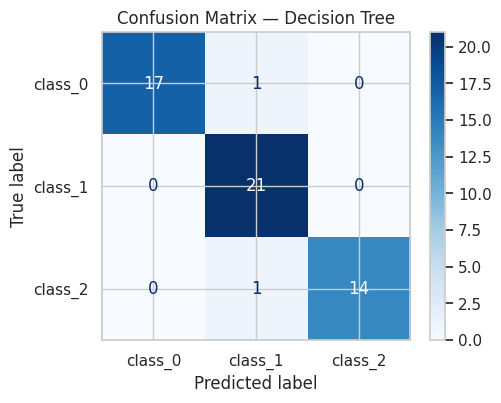

In [ ]:
# 2) Decision Tree (no scaling required)
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
acc_dt = evaluate_model("Decision Tree", dt, X_train, X_test, y_train, y_test)
results.append(("Decision Tree", acc_dt))

===== Random Forest =====
Accuracy: 1.0000

              precision    recall  f1-score   support

     class_0     1.0000    1.0000    1.0000        18
     class_1     1.0000    1.0000    1.0000        21
     class_2     1.0000    1.0000    1.0000        15

    accuracy                         1.0000        54
   macro avg     1.0000    1.0000    1.0000        54
weighted avg     1.0000    1.0000    1.0000        54



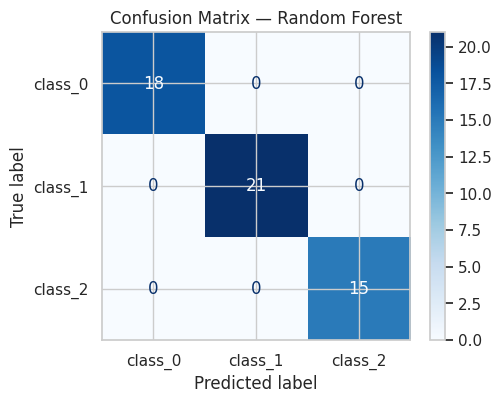

In [ ]:
# 3) Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE)
acc_rf = evaluate_model("Random Forest", rf, X_train, X_test, y_train, y_test)
results.append(("Random Forest", acc_rf))

===== K-Nearest Neighbors (k=5) =====
Accuracy: 0.9444

              precision    recall  f1-score   support

     class_0     1.0000    1.0000    1.0000        18
     class_1     1.0000    0.8571    0.9231        21
     class_2     0.8333    1.0000    0.9091        15

    accuracy                         0.9444        54
   macro avg     0.9444    0.9524    0.9441        54
weighted avg     0.9537    0.9444    0.9448        54



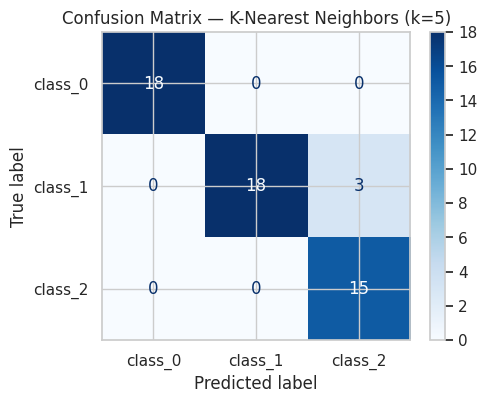

In [ ]:
# 4) K-Nearest Neighbors (scale important)
knn = KNeighborsClassifier(n_neighbors=5)
knn_pipeline = make_pipeline(StandardScaler(), knn)
acc_knn = evaluate_model("K-Nearest Neighbors (k=5)", knn_pipeline, X_train, X_test, y_train, y_test)
results.append(("KNN (k=5)", acc_knn))

===== Gaussian Naive Bayes =====
Accuracy: 1.0000

              precision    recall  f1-score   support

     class_0     1.0000    1.0000    1.0000        18
     class_1     1.0000    1.0000    1.0000        21
     class_2     1.0000    1.0000    1.0000        15

    accuracy                         1.0000        54
   macro avg     1.0000    1.0000    1.0000        54
weighted avg     1.0000    1.0000    1.0000        54



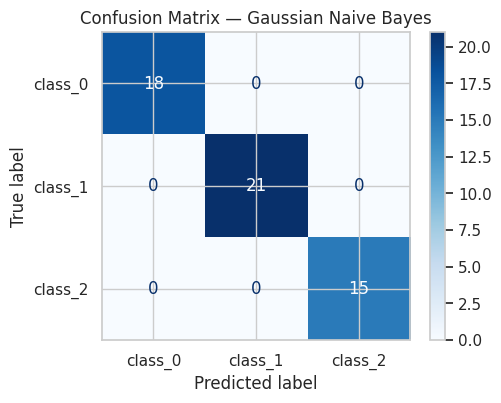

In [ ]:
# 5) Gaussian Naive Bayes
gnb = GaussianNB()
acc_gnb = evaluate_model("Gaussian Naive Bayes", gnb, X_train, X_test, y_train, y_test)
results.append(("GaussianNB", acc_gnb))

===== SVM (RBF) =====
Accuracy: 0.9815

              precision    recall  f1-score   support

     class_0     1.0000    1.0000    1.0000        18
     class_1     0.9545    1.0000    0.9767        21
     class_2     1.0000    0.9333    0.9655        15

    accuracy                         0.9815        54
   macro avg     0.9848    0.9778    0.9808        54
weighted avg     0.9823    0.9815    0.9814        54



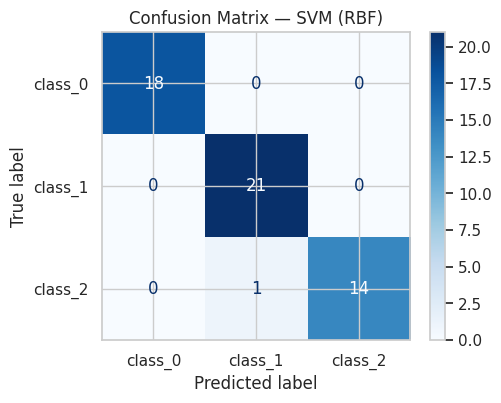

In [ ]:
# 6) Support Vector Machine (RBF) — scale important
svc = SVC(kernel='rbf', probability=False, random_state=RANDOM_STATE)
svc_pipeline = make_pipeline(StandardScaler(), svc)
acc_svc = evaluate_model("SVM (RBF)", svc_pipeline, X_train, X_test, y_train, y_test)
results.append(("SVM (RBF)", acc_svc))

## 7. Compare model performance (summary table)

,Model,Accuracy
0,GaussianNB,1.000000
1,Random Forest,1.000000
2,SVM (RBF),0.981481
3,Logistic Regression,0.981481
4,Decision Tree,0.962963
5,KNN (k=5),0.944444


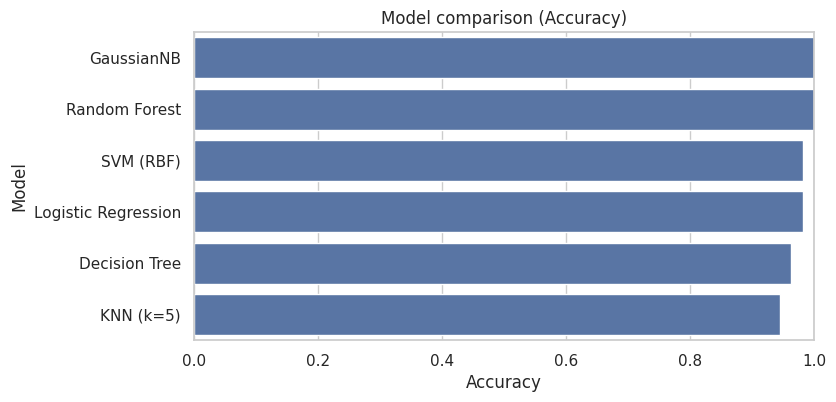

In [ ]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
display(results_df)

# Simple bar chart of accuracies
plt.figure(figsize=(8,4))
sns.barplot(data=results_df, x='Accuracy', y='Model')
plt.xlim(0,1)
plt.title("Model comparison (Accuracy)")
plt.show()

## 8. Short analysis template (fill with actual numbers from your run)

# Example observations you can paste into your report:
#
- Best model by accuracy: <Model name> with accuracy = <value>
- Notes on performance:
- Logistic Regression: strengths/weaknesses (e.g., linear decision boundary, performs well if classes separable).
- Decision Tree: may overfit (check depth); interpretable.
- Random Forest: typically robust; reduces overfitting; good feature importance.
- KNN: sensitive to scaling and k; slower at prediction when dataset bigger.
- GaussianNB: fast, performs well if feature independence approx. holds.
- SVM: good boundary for complex separation; needs scaling and tuning of C/gamma.
#
- Confusion matrix insights: mention which classes are confused (e.g., class 1 misclassified as class 2).
#
- Recommendations: prefer "best model" for this dataset because "reasons". Consider hyperparameter tuning (GridSearchCV) or cross-validation for production.


## 9. Save results

In [ ]:
results_df.to_csv("Classification_models_results_summary.csv", index=False)
print("Saved results to Classification_models_results_summary.csv")

Saved results to Classification_models_results_summary.csv
